In [1]:
import pandas as pd
import numpy as np

In [2]:
import nltk

In [3]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [4]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...


True

In [9]:
!pip install wordcloud

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
imdb = pd.read_csv('C:/Users/Administrator/Downloads/imdb_sentiment.csv')

In [4]:
imdb.head()

,review,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [5]:
imdb['sentiment'].value_counts()

1    386
0    362
Name: sentiment, dtype: int64

##### Labels are provided hence supervised way
negative -0  positive -1

### Bag of Words Analysis

###### frequency anlaysis on individual words

In [6]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


###### wordcloud library automatically remove the stopwords.
what we have a column that have each sentence, we need to join these column rowss.

In [16]:
x = ['a','b','c','d']
" ".join(x)

'a b c d'

In [18]:
input_string = ' '.join(imdb['review'])

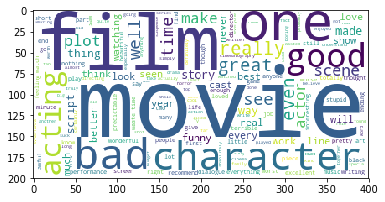

In [20]:
wc = WordCloud(background_color ='white').generate(input_string)
plt.imshow(wc)

## Text Cleaning

#### 1 Convert every character to lower case

#### 2 Remove junk values character

#### 3 Remove commonly used Words

#### 4 Identify root of the words (play,plays,playing,played)---> play
   a) Stemming
   b) Leminitization

###### We will use these steps for supervised sentiment analysis

In [23]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]',' ')

In [27]:
stopwords = nltk.corpus.stopwords.words('english')
len(stopwords)


179

#### Stemming sees last few words and  remove ed and ing and tion, data loss will be there

In [35]:
stemmer = nltk.stem.PorterStemmer()
stemmer.stem('plays')


'play'

In [50]:
docs_clean = []
for doc in docs.head(2):
    words =doc.split(' ')
    print(doc)
    #print(words)
    words_clean = []
    for word in words:
        if word not in stopwords:
            word = stemmer.stem(word)
            words_clean.append(word)
    doc_clean = ' '.join(words_clean)
    docs_clean.append(doc_clean)
    print(doc_clean)
    #print(words_clean)
    print('--------')

a very  very  very slow moving  aimless movie about a distressed  drifting young man   
  slow move  aimless movi distress  drift young man   
--------
not sure who was more lost   the flat characters or the audience  nearly half of whom walked out   
sure lost   flat charact audienc  nearli half walk   
--------


In [64]:
docs = imdb['review'].str.lower().str.replace('[^a-z ]', '')
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(word) for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0      slowmov aimless movi distress drift young man  
1    sure lost  flat charact audienc nearli half wa...
2    attempt arti black  white clever camera angl m...
3                            littl music anyth speak  
4    best scene movi gerardo tri find song keep run...
Name: review, dtype: object

### Document Term Matrix

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer()
vectorize.fit(docs_clean)
dtm = vectorize.transform(docs_clean)
dtm

<748x2475 sparse matrix of type '<class 'numpy.int64'>'
	with 6797 stored elements in Compressed Sparse Row format>

In [55]:
dtm.shape

(748, 2377)

In [56]:
docs_clean.shape

(748,)

In [72]:
no_of_zeros = (748*2475) - 6797
sparsity = ((no_of_zeros)/(748*2475))*100
sparsity

99.63285259007183

In [69]:
df_dtm = pd.DataFrame(dtm.toarray() , columns = vectorize.get_feature_names())
(df_dtm == 0).sum().sum()

1844503

In [73]:
df_dtm.sum().sort_values(ascending = False).head()

movi    207
film    184
one      79
bad      67
like     59
dtype: int64

In [74]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(df_dtm , test_size = 0.2, random_state =100)

In [75]:
test_y = imdb.iloc[test_x.index]['sentiment']
train_y = imdb.iloc[train_x.index]['sentiment']

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state = 100)
rf_model.fit(train_x , train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y ,rf_predict_class)

0.6733333333333333

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state = 100 , n_estimators= 300)
rf_model.fit(train_x , train_y)
rf_predict_class = rf_model.predict(test_x)
accuracy_score(test_y ,rf_predict_class)

0.72

In [80]:
from sklearn.naive_bayes import GaussianNB
model_nb = GaussianNB()
from sklearn.metrics import accuracy_score
model_nb.fit(train_x , train_y)
rf_predict_class = model_nb.predict(test_x)
accuracy_score(test_y ,rf_predict_class)

0.5933333333333334

In [81]:
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.metrics import accuracy_score
mnb_model = MultinomialNB()
gnb_model = GaussianNB()
mnb_model.fit(train_x , train_y)
mnb_predict_class = mnb_model.predict(test_x)
print(accuracy_score(test_y ,mnb_predict_class) ,'multinomial')
gnb_model.fit(train_x , train_y)
gnb_predict_class = gnb_model.predict(test_x)
print(accuracy_score(test_y ,gnb_predict_class) ,'gausian')

0.7733333333333333 multinomial
0.5933333333333334 gausian


In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [88]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_dtm , test_size = 0.2, random_state =100)

In [89]:
from sklearn.feature_extraction.text import TfidfVectorizer

 

train, test = train_test_split(docs_clean, test_size = 0.2, random_state = 100)

tfidf = TfidfVectorizer()

tfidf.fit(train)

train_dtm_tfidf = tfidf.transform(train)

test_dtm_tfidf = tfidf.transform(test)

df_train_tfidf = pd.DataFrame(train_dtm_tfidf.toarray(),

                             columns=tfidf.get_feature_names())

df_test_tfidf = pd.DataFrame(test_dtm_tfidf.toarray(),

                             columns=tfidf.get_feature_names())

train_y = imdb.iloc[df_train_tfidf.index]['sentiment']

test_y = imdb.iloc[df_test_tfidf.index]['sentiment']

 

rf_model = RandomForestClassifier(random_state=100,n_estimators=300)

rf_model.fit(df_train_tfidf, train_y)

rf_predict = rf_model.predict(df_test_tfidf)

accuracy_score(test_y, rf_predict)

0.4866666666666667